# 利用類神經網路來判斷員工是否離職

底下的 %tensorflow_version 2.x 是所謂的 **魔術指令 (magic instruction)**. 

只要看到指令前有 ``%`` 符號的，就是魔術指令。魔術指令用來操作 colab。

``%tensorflow_version 2.x`` 是跟 colab 說，目前在這個 notebook 中，我要是要匯入 tensorflow 的話，請匯入 2.x 的版本。

Colab 目前支援 tensorflow 1.x 以及 2.x 版。2.x 版是在 2019 年正式 release，所以還很新。Colab **預設** 是支援 1.x 版。

若沒有特別指定的話，載入的是 1.x 版。

**注意: ** 在網路上會有文件教你/妳用 pip 的方式在 Colab 上裝 tensorflow 2.x。請不要使用這種方式，在 Google 的官方文件中有指出，這樣的方式會造成校能上的影響。因此建議使用 ``%tensorflow_version 2.x`` 的方式來處理。

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
# import tensorflow and check out the version
import tensorflow
from tensorflow import keras
print(tensorflow.__version__)

2.1.0


## 欄位說明
- RowNumber: 列編號
- CustomerId: 客戶 id
- Surname: 姓
- CreditScore: 信用評級
- Geography: 所在區域
- Gender: 性別
- Age: 年齡
- Tenure: 成為客戶的時間
- Balance: 存款數
- NumOfProducts: 使用本銀行多少的產品
- HasCrCard: 是否有信用卡
- IsActiveMember: 是否為活躍用戶
- EstimatedSalary: 預估薪水
- Exited: 是否會不用本銀行的服務

Exited 欄位是我們要預估的結果。也就是說，我們要處理的是「分類」問題。

將客戶分成兩類：會離開，以及不會離開。

In [21]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [13]:
df.shape

(10000, 14)

In [22]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
x = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = df[['Exited']]

In [24]:
#如果嫌 x = df[['CreditScore', 'Geography',
#       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
#       'IsActiveMember', 'EstimatedSalary']]
#這樣寫太長的話，底下是另一種寫法
#3 是 CreditScore 的索引值， 12 是 EstimatedSalary 的索引值。所以 3:12 就是取
#CreditScore 到 EstimatedSalary 間所有的欄位值 
x1 = df.iloc[:, 3:12]
x1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1
2,502,France,Female,42,8,159660.80,3,1,0
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1
5,645,Spain,Male,44,8,113755.78,2,1,0
6,822,France,Male,50,7,0.00,2,1,1
7,376,Germany,Female,29,4,115046.74,4,1,0
8,501,France,Male,44,4,142051.07,2,0,1
9,684,France,Male,27,2,134603.88,1,1,1


In [25]:
x.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


## 替 Geography	以及 Gender 編碼

Geography 以及 Gender 都是類別變數，將之轉換為數值型態。

之後進行 one-hot encoding


In [26]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder() # 建構一個 labelEncoder 工廠
x.Geography = lc.fit_transform(x.Geography)
x.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10
5,645,2,Male,44,8,113755.78,2,1,0,149756.71
6,822,0,Male,50,7,0.00,2,1,1,10062.80
7,376,1,Female,29,4,115046.74,4,1,0,119346.88
8,501,0,Male,44,4,142051.07,2,0,1,74940.50
9,684,0,Male,27,2,134603.88,1,1,1,71725.73


In [30]:
x.Gender = lc.fit_transform(x.Gender)
x.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88
8,501,0,1,44,4,142051.07,2,0,1,74940.50
9,684,0,1,27,2,134603.88,1,1,1,71725.73


In [31]:
#替 Geography 做 One-hot encoding
x = pd.get_dummies(x, prefix='Geo', prefix_sep='_', columns=['Geography'], drop_first=True)
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_1,Geo_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train.shape

(7000, 11)

In [50]:
model = keras.models.Sequential()
#first input layer
model.add(keras.layers.Dense(6, input_dim=11, activation='relu'))
#second hidden layer
model.add(keras.layers.Dense(6, activation='relu'))
#output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.layers

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [61]:
history = model.fit(x_train, y_train, epochs=100)

Train on 7000 samples
Epoch 1/100
7000/7000 [==============================] - 0s 49us/sample - loss: 0.3419 - accuracy: 0.8627
Epoch 2/100
7000/7000 [==============================] - 0s 48us/sample - loss: 0.3416 - accuracy: 0.8639
Epoch 3/100
7000/7000 [==============================] - 0s 46us/sample - loss: 0.3416 - accuracy: 0.8640
Epoch 4/100
7000/7000 [==============================] - 0s 48us/sample - loss: 0.3414 - accuracy: 0.8630
Epoch 5/100
7000/7000 [==============================] - 0s 47us/sample - loss: 0.3412 - accuracy: 0.8641
Epoch 6/100
7000/7000 [==============================] - 0s 46us/sample - loss: 0.3410 - accuracy: 0.8643
Epoch 7/100
7000/7000 [==============================] - 0s 46us/sample - loss: 0.3409 - accuracy: 0.8636
Epoch 8/100
7000/7000 [==============================] - 0s 46us/sample - loss: 0.3408 - accuracy: 0.8637
Epoch 9/100
7000/7000 [==============================] - 0s 45us/sample - loss: 0.3406 - accuracy: 0.8644
Epoch 10/100
7000/7000 [

In [58]:
y_pred = model.predict(x_test)
y_pred

array([[0.3384137 ],
       [0.34767726],
       [0.20944875],
       ...,
       [0.08316356],
       [0.08841125],
       [0.6579032 ]], dtype=float32)

In [0]:
y_pred = (y_pred > 0.5)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2261,  118],
       [ 305,  316]])

In [64]:
dfResult = pd.DataFrame(history.history)
dfResult.head(8)

,loss,accuracy
0,0.341880,0.862714
1,0.341633,0.863857
2,0.341580,0.864000
3,0.341367,0.863000
4,0.341242,0.864143
5,0.341028,0.864286
6,0.340852,0.863571
7,0.340835,0.863714


In [66]:
dfResult.shape

(100, 2)

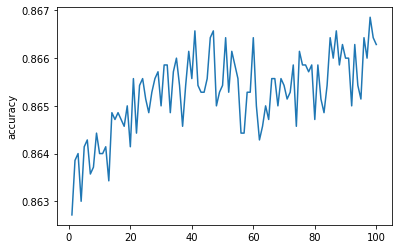

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x=range(1,101), y=dfResult.accuracy)
